Link Video : https://binusianorg-my.sharepoint.com/personal/arvio_anandi_binus_ac_id/_layouts/15/guestaccess.aspx?docid=0b721ef4b383c4941a1e4d914ec005afe&authkey=AVMqHBfdOhp0cojOhm7vlik&e=jaTrsn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import scipy.stats as stats
from keras.callbacks import EarlyStopping
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Baca dataset dari file CSV
df = pd.read_csv('C://Users/User/Downloads/UAS_DL/AAPL.csv')

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.436848,11737600
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.459840,12000800
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.502287,13893600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
target = df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [7]:
target

,Date,Close
0,1980-12-12,0.513393
1,1980-12-15,0.486607
2,1980-12-16,0.450893
3,1980-12-17,0.462054
4,1980-12-18,0.475446
...,...,...
9904,2020-03-26,258.440002
9905,2020-03-27,247.740005
9906,2020-03-30,254.809998
9907,2020-03-31,254.289993


In [8]:
target.index = pd.to_datetime(target.Date)

<AxesSubplot:xlabel='Date'>

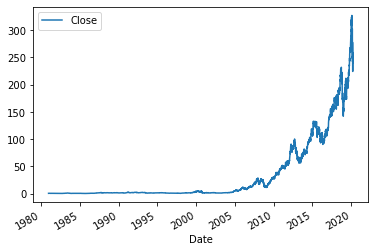

In [9]:
target.plot()

In [10]:
# Convert 'Date' column to datetime type
target['Date'] = pd.to_datetime(target['Date'])

# Get the start of the week for each date
target['WeekStart'] = target['Date'] - pd.to_timedelta(target['Date'].dt.dayofweek, unit='d')

# Group by week and count the number of unique dates in each week
week_counts = target.groupby('WeekStart')['Date'].nunique()

# Find the weeks with 5 unique dates (complete weeks)
complete_weeks = week_counts[week_counts == 5].index

# Filter the DataFrame to keep only the complete weeks
cleaned_df = target[target['WeekStart'].isin(complete_weeks)]

# Reset the index if desired
cleaned_df.reset_index(drop=True, inplace=True)

To handle missing dates in the dataset, we create a new column called WeekStart which is the replication of Date column, then we find the week with 5 unique dates (complete weeks), and lastly we filter the dataframe to keep only the complete weeks and reset the index to get a new dataframe with only complete weekdays.

In [11]:
# Print the resulting DataFrame
cleaned_df.head(30)

,Date,Close,WeekStart
0,1980-12-15,0.486607,1980-12-15
1,1980-12-16,0.450893,1980-12-15
2,1980-12-17,0.462054,1980-12-15
3,1980-12-18,0.475446,1980-12-15
4,1980-12-19,0.504464,1980-12-15
5,1981-01-05,0.602679,1981-01-05
6,1981-01-06,0.575893,1981-01-05
7,1981-01-07,0.551339,1981-01-05
8,1981-01-08,0.540179,1981-01-05
9,1981-01-09,0.569196,1981-01-05


In [12]:
target = cleaned_df.drop(['WeekStart'],axis=1)

Filter the dataset from unused column WeekStart.

In [13]:
target.index = pd.to_datetime(target.Date)
target = target.drop(['Date'],axis=1)

We set the target Date as the target index and we remove the unused Date column

In [14]:
target.head(20)

,Close
Date,
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446
1980-12-19,0.504464
1981-01-05,0.602679
1981-01-06,0.575893
1981-01-07,0.551339
1981-01-08,0.540179


## Stationarity

In [15]:
sts.adfuller(target)

(2.872676116150048,
 1.0,
 37,
 8512,
 {'1%': -3.431118476637194,
  '5%': -2.861879614422937,
  '10%': -2.566950771852056},
 29132.40439909454)

The t-statistics value is greater than the 1%, 5%, and 10% critical values from the Dicky-Fuller table, which means for all level of these significance, there is no sufficient evidence of stationarity in the dataset. However, by looking at the p-value, it is certain that the data comes from a non-stationary process therefore, detrending methods such as differencing or fitting a regression model and subtracting the fitted values are needed for this dataset.

In [16]:
# Assuming your data is stored in a DataFrame called 'df' with a column named 'Value'

# Log transformation
target['Close'] = np.log(target['Close'])

# Perform differencing on the log-transformed data
target['Close'] = target['Close'].diff()
target = target.dropna()

We handle the non-stationarity in the dataset by applying the log transformation and differencing method on the data, and drop the missing values created by the differencing method.

In [17]:
sts.adfuller(target)

(-45.9095401230632,
 0.0,
 3,
 8545,
 {'1%': -3.4311155079592166,
  '5%': -2.8618783026381287,
  '10%': -2.5669500735787305},
 -34819.45022280677)

The dataset p-value indicates that the dataset comes from a stationarity process.

## Window Partition

In [18]:
def window_partition(df,window_size=5):
    df_np = df.to_numpy()
    X = []
    y = []
    for i in range(0,len(df_np)-window_size,5):
        row = [[a] for a in df_np[i:i+5]]
        col = [[a] for a in df_np[i+5:i+10]]
        X.append(row)
        y.append(col)
    return np.array(X), np.array(y)

We partition the data by iterating through the dataset with timestep of 5, where in each iteration, we assign the first 5 values to the row variable, and the next 5 values to the col variable, then we append these values to an empty list of X and y. After the iterations, we return the X and y values as numpy. 

In [19]:
WINDOW_SIZE = 5
X, y = window_partition(target, WINDOW_SIZE)
X.shape, y.shape

((1709, 5, 1, 1), (1709,))

We apply the function to the dataset with window size of 5, and we print out the shape resulting the shape shown above.

In [20]:
X= X[:-1]
y= y[:-1]

We remove the last data from X and y as they turned out to be incomplete values after checking on the data.

In [21]:
# Reshape 'x' to (1708, 5)
X = X.reshape(1708, 5)
X.shape

(1708, 5)

We reshape the data to the format of (None,5) to fit the model input shape.

In [22]:
l=[]
rsh= lambda y:np.array(y).reshape(5)
for i in range(len(y)):
    l.append(rsh(y[i]))

We also reshape the y data by reshaping through the iterations and appending each reshaped values to the list variable called l.

In [23]:
y = np.array(l)
y.shape

(1708, 5)

We transform the data to numpy and we print out the shape of y with results as shown above.

The data is reshaped and now fit for further processing.

## Data Splitting (80% Train, 10% Test, 10% Val)

In [24]:
train_size = int(len(X)*0.8)
val_size = int(len(X)*0.1)

X_train, y_train = X[:train_size],y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:],y[train_size+val_size:]
X_train.shape, y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1366, 5), (1366, 5), (170, 5), (170, 5), (172, 5), (172, 5))

The dataset is split into 80% training data, 10% testing data, and 10% validation data.

Short summary for preprocessing and exploration part : Overall, the dataset requires some preprocessing and exploration to be done such as handling non-stationarity, handling missing values, handling missing dates in the dataset, window partitioning, and splitting. Therefore, we can proceed to next steps.

# 1.b.

## 1st Architecture

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint


# Determine the number of classes
num_classes = 1367

# Set the input shape
input_shape = (5, 1)

# Define the model architecture
def create_transformer_model(input_shape, num_classes):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    x= inputs
    
    # Feature embedding
    x = layers.Embedding(input_dim=10000, output_dim=128)(inputs)
    x = Reshape(target_shape=(5,128))(x)
    x = layers.Dropout(0.1)(x)
    
    # Positional embedding
    positions = tf.range(start=0, limit=input_shape[1], delta=1)
    positions = layers.Embedding(input_dim=input_shape[1], output_dim=128)(positions)

    
    # Add positional embedding to the input
    x = layers.Add()([x, positions])
    
    # Multi-Head Attention
    skip = x
    x = layers.MultiHeadAttention(num_heads=8, key_dim=16)(x, x)
    x+=skip
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    skip = x
    # Reshape the input for Conv1D
    x = layers.Reshape(target_shape=(input_shape[0], -1))(x)

    # Feed Forward using 1 layer of Conv1D with activation ReLU
    x = layers.Conv1D(filters=1, kernel_size=1, activation="relu")(x)
    x+=skip
    x = layers.GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Take the last time step to create linear output
    x = layers.Dense(units=5)(x)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=x)
    return model

# Create the transformer model
model1 = create_transformer_model(input_shape, num_classes)

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 5, 1, 128)    1280000     ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 5, 128)       0           ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 5, 128)       0           ['reshape[0][0]']                
                                                                                              

In [26]:
# Train the model
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
43/43 [==============================] - 7s 63ms/step - loss: 0.3678 - root_mean_squared_error: 0.6065 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 2/10
43/43 [==============================] - 2s 51ms/step - loss: 0.2406 - root_mean_squared_error: 0.4905 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 3/10
43/43 [==============================] - 2s 48ms/step - loss: 0.2291 - root_mean_squared_error: 0.4787 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0470
Epoch 4/10
43/43 [==============================] - 2s 56ms/step - loss: 0.2147 - root_mean_squared_error: 0.4634 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 5/10
43/43 [==============================] - 2s 57ms/step - loss: 0.1995 - root_mean_squared_error: 0.4466 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444
Epoch 6/10
43/43 [==============================] - 3s 61ms/step - loss: 0.1696 - root_mean_squared_error: 0.4119 - val_loss: 0.0022 - val_root_m

# 1.c. 

## 2nd Architecture

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint


# Determine the number of classes
num_classes = 1367

# Set the input shape
input_shape = (5, 1)

# Define the model architecture
def create_transformer_model(input_shape, num_classes):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    x= inputs
    
    # Multi-Head Attention
    skip = x
    x = layers.MultiHeadAttention(num_heads=8, key_dim=16)(x, x)
    x+=skip
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    skip = x
    # Reshape the input for Conv1D
    x = layers.Reshape(target_shape=(input_shape[0], -1))(x)

    # Feed Forward using 1 layer of Conv1D with activation ReLU
    x = layers.Conv1D(filters=16, kernel_size=1, activation="relu")(x)
    x = layers.Conv1D(filters=16, kernel_size=1, activation="relu")(x)
    x = layers.Conv1D(filters=16, kernel_size=1, activation="relu")(x)
    x+=skip
    x = LSTM(50,return_sequences=True)(x)
    x = LSTM(50,return_sequences=True)(x)
    x = LSTM(50)(x)
    x = Flatten()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Take the last time step to create linear output
    x = layers.Dense(units=16)(x)
    x = layers.Dense(units=8)(x)
    x = layers.Dense(units=4)(x)
    x = layers.Dense(units=5)(x)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=x)
    return model

# Create the transformer model
model2 = create_transformer_model(input_shape, num_classes)

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.003), loss="mae", metrics=[RootMeanSquaredError()])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 multi_head_attention_1 (MultiH  (None, 5, 1)        897         ['input_2[0][0]',                
 eadAttention)                                                    'input_2[0][0]']                
                                                                                                  
 tf.__operators__.add_2 (TFOpLa  (None, 5, 1)        0           ['multi_head_attention_1[0][0]', 
 mbda)                                                            'input_2[0][0]']                
                                                                                            

In [28]:
# Train the model
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
43/43 [==============================] - 10s 42ms/step - loss: 0.3620 - root_mean_squared_error: 0.8994 - val_loss: 0.0746 - val_root_mean_squared_error: 0.0819
Epoch 2/10
43/43 [==============================] - 1s 12ms/step - loss: 0.0688 - root_mean_squared_error: 0.0962 - val_loss: 0.0483 - val_root_mean_squared_error: 0.0549
Epoch 3/10
43/43 [==============================] - 1s 13ms/step - loss: 0.0401 - root_mean_squared_error: 0.0546 - val_loss: 0.0176 - val_root_mean_squared_error: 0.0235
Epoch 4/10
43/43 [==============================] - 0s 9ms/step - loss: 0.0286 - root_mean_squared_error: 0.0392 - val_loss: 0.0172 - val_root_mean_squared_error: 0.0229
Epoch 5/10
43/43 [==============================] - 0s 11ms/step - loss: 0.0261 - root_mean_squared_error: 0.0367 - val_loss: 0.0144 - val_root_mean_squared_error: 0.0198
Epoch 6/10
43/43 [==============================] - 0s 9ms/step - loss: 0.0276 - root_mean_squared_error: 0.0381 - val_loss: 0.0168 - val_root_me

The model begins with an input layer that takes in (5, 1) as the input shape. This sets the foundation for processing the sequential data.

Next, we incorporate a crucial component of Multi-Head Attention. This mechanism allows the model to attend to different parts of the input simultaneously, enhancing its ability to capture meaningful relationships. By leveraging eight attention heads and key vectors of dimension 16, our model can effectively process complex patterns within the data.

To augment the learning process, we employ a skip connection, preserving the original input. This connection helps alleviate potential information loss during training. We apply dropout regularization to prevent overfitting and ensure the model's generalization capability.

The subsequent step involves reshaping the input to facilitate the use of Conv1D layers. These layers, characterized by a kernel size of 1 and ReLU activation, further capture relevant features within the data. We introduce another skip connection, adding the intermediate results to the original input. This technique encourages the model to learn from both low-level and high-level representations simultaneously.

To capture long-term dependencies and temporal patterns, we incorporate LSTM layers. These recurrent layers with 50 units each allow the model to understand the sequential nature of the data. By stacking multiple LSTM layers, we enable the model to learn hierarchical representations and extract meaningful insights from the sequences.

To prepare the data for further processing, we flatten the output of the LSTM layers. This transformation converts the multidimensional output into a suitable format for subsequent layers. Dropout regularization and layer normalization are then applied to enhance model performance and stabilize training.

The final part of our architecture consists of several dense layers. These layers gradually reduce the dimensionality of the data and introduce non-linearity. The number of units in the last dense layer is set to match the desired number of output classes, ensuring compatibility with the classification task.

In summary, our transformer-based model architecture combines multi-head attention, Conv1D layers, LSTM layers, and dense layers to effectively capture and understand sequential data. By incorporating skip connections, dropout regularization, and layer normalization, we encourage robust learning and mitigate potential issues during training.

# 1.d.

## Evaluation

In [29]:
model1_predictions = model1.predict(X_test)
model2_predictions = model2.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [30]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

model1_rmse = np.sqrt(mean_squared_error(model1_predictions,y_test))
model2_rmse = np.sqrt(mean_squared_error(model2_predictions,y_test))
model1_mae = mean_absolute_error(model1_predictions,y_test)
model2_mae = mean_absolute_error(model2_predictions,y_test)
model1_mape = mean_absolute_percentage_error(model1_predictions,y_test)
model2_mape = mean_absolute_percentage_error(model2_predictions,y_test)

In [31]:
# Create a dictionary with the evaluation results
evaluation_data = {
    'Model': ['Model 1', 'Model 2'],
    'RMSE': [model1_rmse, model2_rmse],
    'MAE': [model1_mae, model2_mae],
    'MAPE': [model1_mape, model2_mape]
}

# Create a DataFrame from the evaluation data
evaluation = pd.DataFrame(evaluation_data)

# Set the 'Model' column as the index
evaluation.set_index('Model', inplace=True)

# Round the values to 4 decimal places
evaluation = evaluation.round(4)

# Print the evaluation DataFrame
print(evaluation)


           RMSE     MAE    MAPE
Model                          
Model 1  0.0251  0.0191  1.7516
Model 2  0.0074  0.0065  0.4398


RMSE (Root Mean Square Error) measures the prediction accuracy of the model by calculating the square root of the average of the squared differences between the predicted values and the actual values. The lower the RMSE value, the smaller the average deviation or error between the predictions and the actual values. In the context of stock prices, a low RMSE value indicates that the model's predictions tend to closely approximate the actual values accurately.

MAE (Mean Absolute Error) measures the average absolute deviation between the predicted values and the actual values. MAE disregards the direction (positive or negative) of the prediction errors. The lower the MAE value, the closer the predictions are to the actual values overall. In the context of stock prices, a low MAE value indicates that the model generally has the ability to predict prices with low levels of error.

MAPE (Mean Absolute Percentage Error) measures the average percentage of absolute errors relative to the actual values. MAPE provides an indication of how large the prediction errors are in proportion to the actual values. The lower the MAPE value, the smaller the percentage of prediction errors relative to the actual values. In the context of stock prices, a low MAPE value indicates that the model has a low level of error in predicting percentage changes in stock prices.

Overall, the RMSE, MAE, and MAPE values of the second model are lower than those of the first model, indicating that the second model has better ability to capture patterns and trends in the data and minimize prediction errors compared to the first model. Therefore, the model that could be used by DJ Patil to help the company predict stock prices would be the second Transformers model.